# 청와대 국민청원 데이터 분석 시각화
# Data Analysis Visualization for Cheongwadae's national petition

### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Crawling

### Import data

In [0]:
petition_data = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'], index_col='article_id')

In [3]:
petition_data.head()

,start,end,answered,votes,category,title,content
article_id,,,,,,,
21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


## Columns

국민 청원 데이터를 표현하는 값들을 먼저 보자

In [5]:
print(*petition_data.columns.values)

start end answered votes category title content


|분류|의미|
|:-|:-:|  
**start** | 청원 시작 날짜  
**end**| 청원 종료 날짜  
**answered** | 답변  여부 
**votes** | 받은 투표 수  
**cateogry** | 청원 내용의 카테고리  
**title** | 청원 제목  
**content** | 청원 내용

우리는 청원 글들의 내용보다는 제목에서 나타나는 키워드를 뽑고자 하기에, content는 필요없다.  
또한, 청원 종료 날짜는 청원 시작 날짜로부터 유추할 수 있기에 불필요한 정보이다.

In [6]:
petition_data.drop(['content', 'end'], axis=1, inplace=True)
print(*petition_data.columns.values)

start answered votes category title


각 정보들의 간단한 분포와 정보를 알아보자

---


In [7]:
petition_data.describe()

,answered,votes
count,395547.000000,3.955470e+05
mean,0.000073,1.501188e+02
std,0.008562,4.802583e+03
min,0.000000,0.000000e+00
25%,0.000000,2.000000e+00
50%,0.000000,5.000000e+00
75%,0.000000,1.500000e+01
max,1.000000,1.192049e+06


**answered**와 **votes** 항목은 numerical data이다. 

**answered**의 경우, 일종의 *categorical data*로 볼 수 있는데, 답변을 받으면 1 받지 못했으면 0의 값을 가지는데,  
답변을 받지 못한 경우가 압도적으로 많은 것을 확인할 수 있다.  
**votes**의 경우 평균적으로 1.5이지만, 표준편차 등을 확인했을 때 균일한 분포는 아닐 것이라고 유추할 수 있다.

이를 시각화하며 더 자세히 알아보자

## Answered

In [8]:
petition_data.answered.value_counts()

0    395518
1        29
Name: answered, dtype: int64

In [9]:
petition_data[petition_data.votes >= 200000].answered.count()

80

answered가 1인 수보다 20만 이상의 동의를 받은 청원 수가 많음을 확인할 수 있다.  
답변을 받아야하지만, 아직 대기 중이라는 청원들이 많이 존재한다는 뜻이다.  
우리는 20만 이상의 동의를 받은 청원을 답변을 받아야하는 청원으로 볼 것이기 때문에, answered feature는 보지 않아도 된다.

In [0]:
petition_data.drop('answered', axis=1, inplace=True)

## Votes

Votes를 설명하기 위해 가장 많은 Votes를 받은 Top5 DataFrame을 한번 보자.

In [11]:
data_top5 = petition_data.sort_values(["votes"], ascending=[False])
data_top5.head(5)

,start,votes,category,title
article_id,,,,
408609,2018-10-17,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.
269548,2018-06-13,714875,외교/통일/국방,"제주도 불법 난민 신청 문제에 따른 난민법, 무사증 입국, 난민신청허가 폐지/개헌 ..."
10949,2017-09-06,615354,미래,조두순 출소반대
142600,2018-02-19,614127,문화/예술/체육/언론,"김보름, 박지우 선수의 자격박탈과 적폐 빙상연맹의 엄중 처벌을 청원합니다"
230552,2018-05-11,419006,인권/성평등,여성도 대한민국 국민입니다. 성별 관계없는 국가의 보호를 요청합니다.


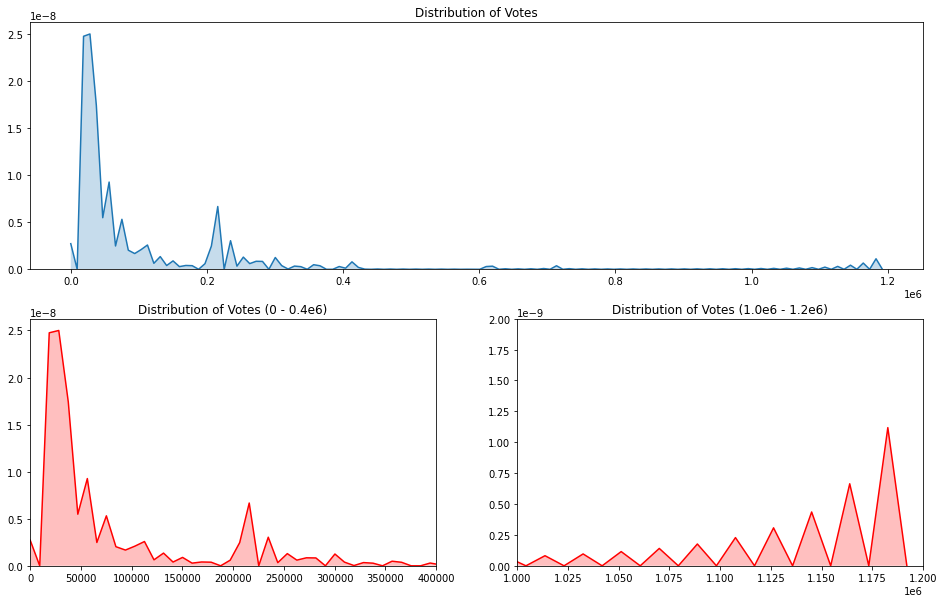

In [13]:
plt.figure(figsize=(16, 10))
plt.subplot(211)
# sns.distplot(petition_data.votes)
sns.kdeplot(data=petition_data.votes, shade=True, legend=False)
plt.title('Distribution of Votes')

# Expand the left-side
plt.subplot(223)
# sns.distplot(petition_data.votes)
sns.kdeplot(data=petition_data.votes, shade=True, legend=False, color='r')
plt.title('Distribution of Votes (0 - 0.4e6)')
plt.xlim(0, 0.4e6)

# Expand the right-side
plt.subplot(224)
# sns.distplot(petition_data.votes)
sns.kdeplot(data=petition_data.votes, shade=True, legend=False, color='r')
plt.title('Distribution of Votes (1.0e6 - 1.2e6)')
plt.xlim(1.0e6, 1.2e6)
plt.ylim(0, 0.2e-8)
plt.show()

---

In [14]:
petition_data.describe(include='O')

,category,title
count,395547,395547
unique,17,346524
top,정치개혁,이명박 출국금지
freq,62750,3018


**category**의 경우, 17개가 있으며, 그 중 '정치개혁'이 가장 많은 것을 확인할 수 있다.  
**title**의 경우, 중복된 title이 약 2만개 정도 존재함을 볼 수 있고, 중복된 제목 중 '국민연금'이 가장 많다는 것을 확인할 수 있다.

## Start
청원 시작 날짜, 다시 말해 청원글을 올린 시점을 보자

In [15]:
petition_data.start.describe()

count                  395547
unique                    535
top       2017-11-11 00:00:00
freq                     9623
first     2017-08-19 00:00:00
last      2019-02-04 00:00:00
Name: start, dtype: object

2018년 이후, 2019년 2월 이전 데이터만 사용하기 위해,  
**start**의 데이터 타입을 datetime으로 바꿔준다


In [17]:
petition_data.start = pd.to_datetime(petition_data.start, format='%Y%m%d')
petition_data = petition_data[petition_data.start >= '2018-01-01']
petition_data = petition_data[petition_data.start <= '2019-01-31']
petition_data.start.describe()

count                  321168
unique                    396
top       2018-01-11 00:00:00
freq                     3368
first     2018-01-01 00:00:00
last      2019-01-31 00:00:00
Name: start, dtype: object

2018년 01월부터 2019년 02월 데이터의 월별 추이를 비교하기 위해,  
연월의 데이터만을 추출한다

In [18]:
petition_data['yearmonth'] = petition_data.start.map(lambda x: 100 * x.year + x.month)
petition_data.columns.values

array(['start', 'votes', 'category', 'title', 'yearmonth'], dtype=object)


이제 월별 추이를 살펴보자



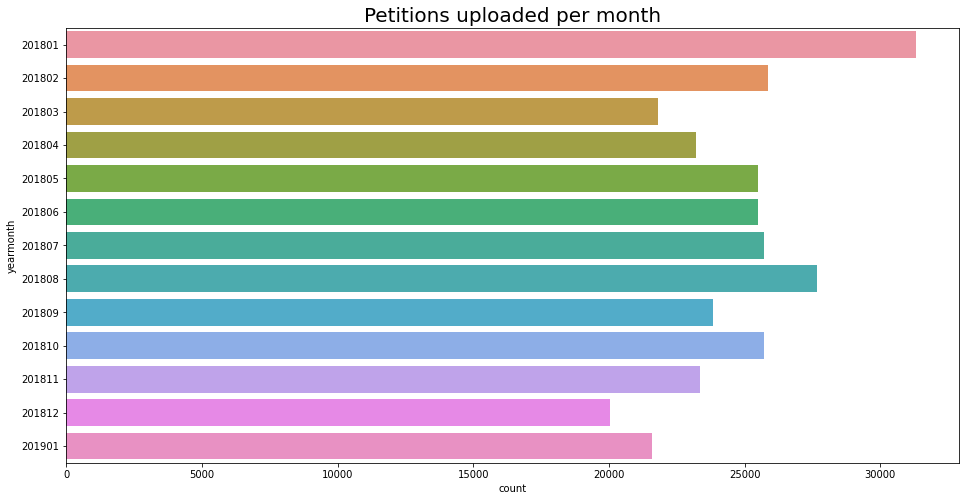

In [19]:
plt.figure(figsize=(16, 8))
plt.title('Petitions uploaded per month', fontsize=20)
sns.countplot(data=petition_data, y='yearmonth')
plt.show()

그렇게 유의미한 정보는 아닌듯하다..  
일별로 혹시 경향성을 보일까 싶어 같은 방식으로 보았지만 크게 의미 없는 듯하다.

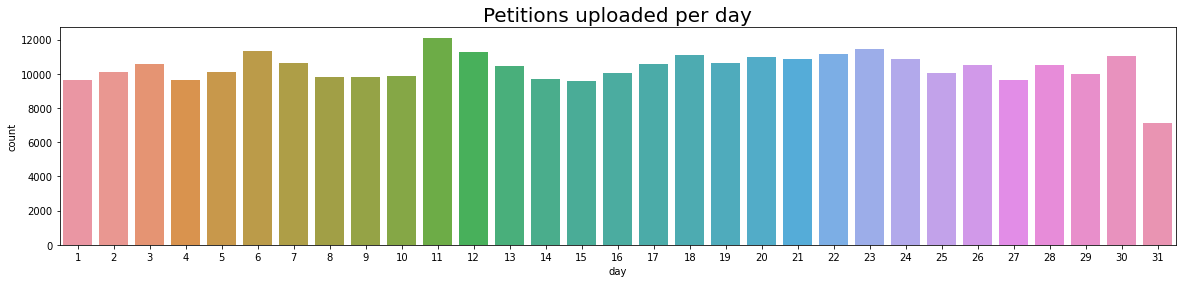

In [20]:
petition_data['day'] = petition_data.start.map(lambda x: x.day)
petition_data.columns.values
plt.figure(figsize=(20, 4))
plt.title('Petitions uploaded per day', fontsize=20)
sns.countplot(data=petition_data, x='day')
plt.show()

## Category

우선 카테고리에 어떤 항목들이 있는지 살펴보자

In [21]:
petition_data.category.value_counts()

정치개혁           47842
기타             38968
인권/성평등         25940
교통/건축/국토       25139
안전/환경          23673
외교/통일/국방       23363
일자리            20246
보건복지           19684
육아/교육          18109
행정             16711
문화/예술/체육/언론    16360
경제민주화          15498
미래             15194
성장동력            6691
반려동물            3336
저출산/고령화대책       2814
농산어촌            1600
Name: category, dtype: int64

총 17개의 카테고리가 있는데, 더 용이하게 다루기 위해 영어 제목으로 바꿔야한다.

In [22]:
ori_category = list(petition_data.category.value_counts().index)
new_category = ['politics', 'etc', 'human_rights', 'traffic', 'safety/environment', \
               'diplomacy', 'education', 'welfare', 'jobs', 'administration', \
               'arts/press', 'future', 'economy', 'development', 'pets', \
               'birth_rate/aging', 'agriculture']
for o, n in zip(ori_category, new_category):
  petition_data.category[petition_data.category == o] = n

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [23]:
petition_data.category.value_counts()

politics              47842
etc                   38968
human_rights          25940
traffic               25139
safety/environment    23673
diplomacy             23363
education             20246
welfare               19684
jobs                  18109
administration        16711
arts/press            16360
future                15498
economy               15194
development            6691
pets                   3336
birth_rate/aging       2814
agriculture            1600
Name: category, dtype: int64

이렇게 영어 카테고리로 바꾸었다.  
각 카테고리별로 올라온 청원 수가 어떻게 되는지 살펴보자

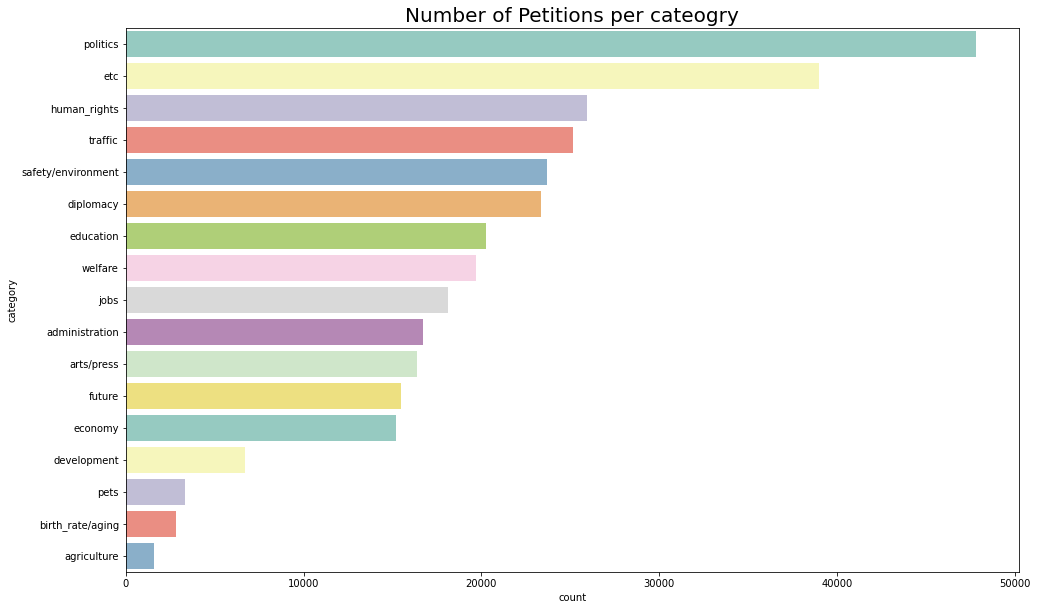

In [24]:
plt.figure(figsize=(16,10))
plt.title("Number of Petitions per cateogry", fontsize=20)
sns.countplot(data=petition_data, y='category', palette="Set3", order=petition_data.category.value_counts().index)
plt.show()

17개의 카테고리 중, Top 5를 뽑아 더 자세하게 보도록 하자

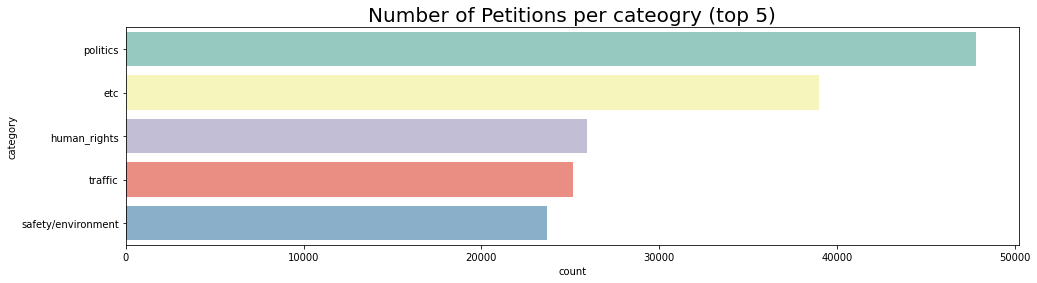

In [25]:
plt.figure(figsize=(16, 4))
plt.title("Number of Petitions per cateogry (top 5)", fontsize=20)
sns.countplot(data=petition_data, y='category', palette="Set3", order=petition_data.category.value_counts().iloc[:5].index)
plt.show()

## Title
먼저, **title**에는 어떤 내용이 들어가는지, 몇개만 그 내용을 살펴보자

In [26]:
print("- ", end='')
print(*petition_data.title[:10].values, sep='\n- ')

- 아...이런데서 이상한 글이 올라오네요...
- 현재 사람들 사이에서 유행하는 게임 "배틀 그라운드" 에 대한 제재를 가하려 합니다.
- 양심수 석방 국가보안법 철폐
- 민주화유공자들에 대한 국가유공자 인정 요청
- UAE 관련
- 칼퇴근법 하루 빨리 시행되었으면 합니다
- 빠른년생을 위한 법 개정
- 다주택자만 문제일까요?
- 가정폭력 처벌 수위를 강화해주세요
- 10년공공임대분양가를 5년공공임대 분양전환 산정방식과 동일하게 변경해 주세요.


우리는 각 Title의 키워드를 추출하여,  
가장 많은 관심을 받은 주제가 무엇인지 알아보았다



```ptyhon
from konlpy.utils import pprint
from konlpy.tag import Kkma, Okt
from collections import Counter
from wordcloud import WordCloud

kkma=Kkma()

df = pd.read_csv('https://s3.ap-northeast-2.amazonaws.com/data10902/petition/petition.csv', parse_dates=['start', 'end'])

df['start']=pd.to_datetime(df['start'], format='%Y%m%d')
data=df['title']
data.to_csv('titlegroup.txt',index=False, header=None)
with open("C:/Users/student/titlegroup.txt","r",encoding='utf-8') as f:
    lines= f.readlines()

okt = Okt()
nouns = []
for line in lines:
    noun = okt.nouns(line)
    nouns.extend(noun)

test = Counter(nouns)
delete_list = ['대한', '위해', '시오', '관련', '대해', '모든','폐지','제발','한국','국가','대한민국','우리','이상']
for word, freq in test.items():
    # 단어 길이가 1인 경우
    if len(word) == 1 or freq < 1700:
        delete_list.append(word)
for word in delete_list:
    del test[word]
test = test.most_common(100)

wc=WordCloud(font_path='C:/Users/student/Desktop/MalgunGothic.TTF',background_color='white', width=1000, height=1000, max_words=100, max_font_size=300)
wc.generate_from_frequencies(dict(test))
wc.to_file("title_wc123.png")
```



![title_wordcloud](https://user-images.githubusercontent.com/57430754/84225134-5bbf0980-ab19-11ea-8b28-de7597e3e716.png)

---

### 데이터 간 관계

우리는 앞서 category 항목에서 가장 많은 글 수를 가진 카테고리를 확인했다.
- 정치개혁
- 기타
- 인권/성평등
- 교통/건축/국토
- 안전/환경

그렇다면 각 카테고리별로 받은 청원 동의수도 비슷한 경향을 보일까?

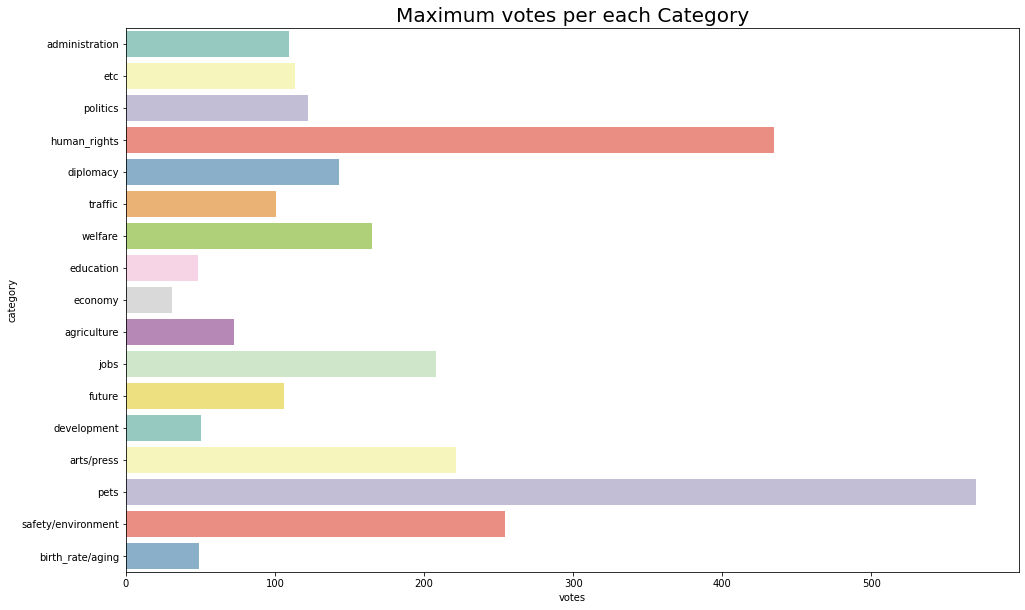

In [27]:
plt.figure(figsize=(16, 10))
plt.title('Maximum votes per each Category', fontsize=20)
sns.barplot(data=petition_data, x='votes', y='category', palette="Set3", ci=None)
plt.show()

카테고리 당 가장 많은 동의를 받은 청원수가 큰 카테고리는  
- 반려 동물
- 정치개혁
- 안전/환경
- 문화/예술/체육/언론
- 일자리

로, 많은 청원이 올라온 카테고리와는 또 다른 면을 보여준다

각 카테고리별 총 청원 동의수 또한 볼 수 있다

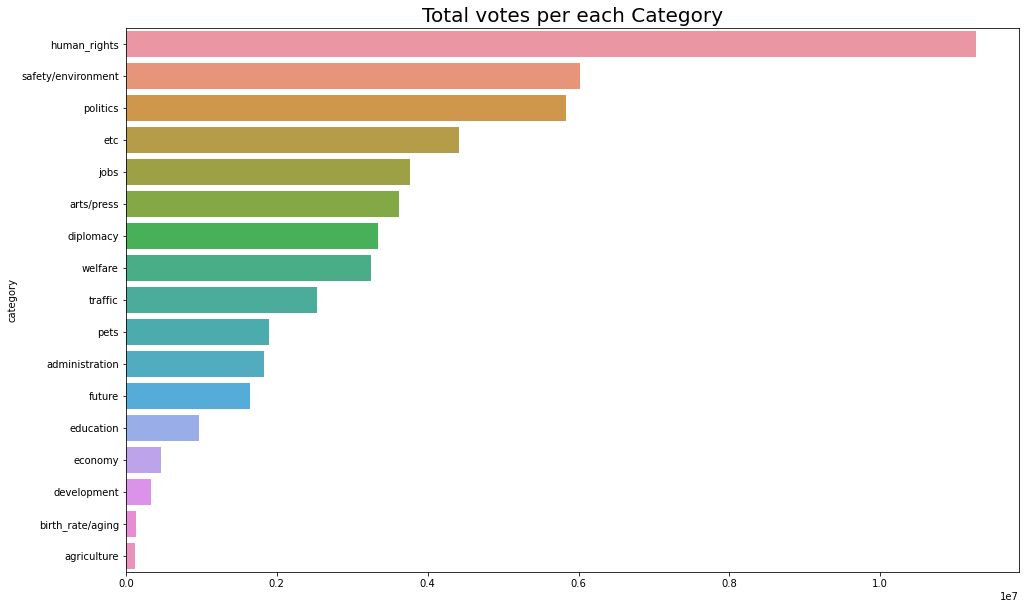

In [29]:
group_by_category = petition_data.votes.groupby(petition_data.category).sum().sort_values(ascending=False)

plt.figure(figsize=(16, 10))
plt.title('Total votes per each Category', fontsize=20)
sns.barplot(y=group_by_category.index, x=group_by_category.values, order=group_by_category.index)
plt.show()

가장 많은 총 동의 수를 얻은 카테고리는  
- 인권/성평등
- 안전/환경
- 정치개혁
- 기타
- 일자리

로 볼 수 있다.


---
동의 수 별 경향을 파악해보기 위해,  
답변을 받아야하는 기준인 20만개의 동의를 받은 청원 글,  
답변을 받지 않아도 되지만 10만개 이상의 많은 동의를 받은 청원 글,  
그리고 10만개 미만의 동의를 받은 청원 글로 분류해보았다

In [0]:
high = petition_data[petition_data.votes >= 200000]
middle = petition_data[petition_data.votes < 200000]
middle = middle[middle.votes >= 100000]
low = petition_data[petition_data.votes < 100000]

In [31]:
print("20만개 이상:", high.size, "\n10만개 이상 20만개 미만:", middle.size, "\n10만개 미만:", low.size)

20만개 이상: 432 
10만개 이상 20만개 미만: 150 
10만개 미만: 1926426


각 분류 별로, 카테고리의 분포를 살펴보자

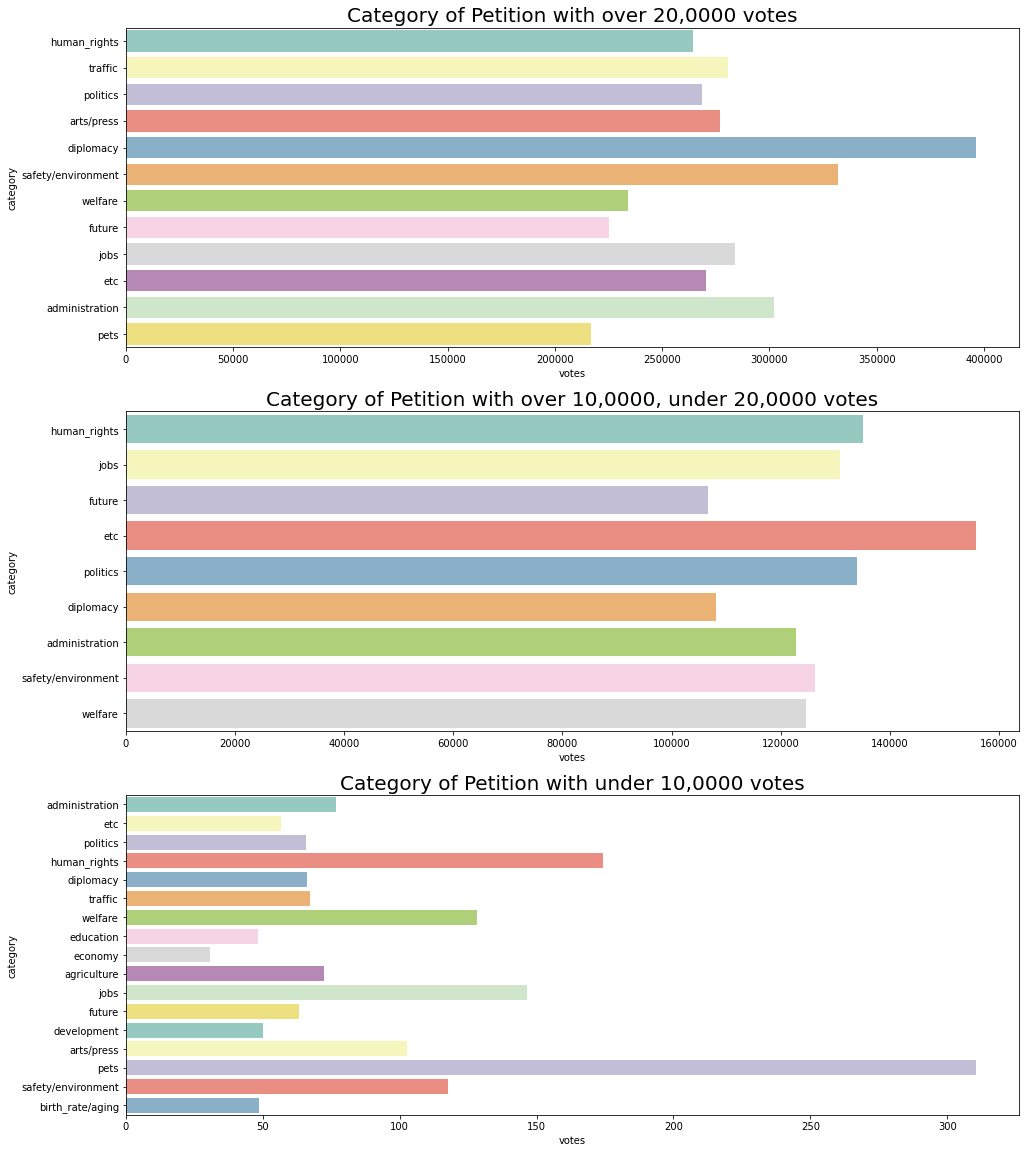

In [32]:
plt.figure(figsize=(16, 20))

plt.subplot(311)
plt.title('Category of Petition with over 20,0000 votes', fontsize=20)
sns.barplot(data=high, x='votes', y='category', palette="Set3", ci=None)

plt.subplot(312)
plt.title('Category of Petition with over 10,0000, under 20,0000 votes', fontsize=20)
sns.barplot(data=middle, x='votes', y='category', palette="Set3", ci=None)

plt.subplot(313)
plt.title('Category of Petition with under 10,0000 votes', fontsize=20)
sns.barplot(data=low, x='votes', y='category', palette="Set3", ci=None)

plt.show()

- 200,000 이상의 청원의 경우 **'diplomacy'**가 가장 많은 답변을 받았다.
- 100,000 이상 200,000 미만의 청원의 경우 다수의 카테고리가 비슷한 양상으로 많은 관심을 받은 것임을 알 수 있다.
- 100,000 이하 청원의 경우 **'pets'**이 가장 많은 청원을 받았음을 알 수 있다.


또한, 10만개 이상의 청원글의 경우, 한번도 다루어지지 않은 카테고리가 있음을 발견할 수 있다.
- 200,000건 이상의 청원 중 한번도 다루어지지 않은 카테고리 목록이다.


In [0]:
cat = high.category.value_counts().index
not_included = []
for tmp in new_category:
  if tmp not in cat:
    not_included.append(tmp)
print(not_included)
  

['education', 'economy', 'development', 'birth_rate/aging', 'agriculture']


- 100,000 이상 200,000 미만의 청원의 경우 한번도 다루어지지 않은 카테고리 목록이다. 

In [0]:
cat = middle.category.value_counts().index
not_included = []
for tmp in new_category:
  if tmp not in cat:
    not_included.append(tmp)
print(not_included)

['traffic', 'education', 'arts/press', 'economy', 'development', 'pets', 'birth_rate/aging', 'agriculture']
